In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\CNP\CNP_NG_20.xlsx', header=None,names=column_names)
df

,column 1,column 2
0,-0.45866,NaN
1,0.24348,-0.873130
2,NaN,-0.808030
3,0.21462,-0.951980
4,0.12829,-1.031400
...,...,...
3995,0.89265,0.278030
3996,0.74741,0.428530
3997,1.07660,0.085708
3998,NaN,0.351420


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	800
float64		column 2	800


In [4]:
df.describe()

,column 1,column 2
count,3200.000000,3200.000000
mean,0.011441,-0.002677
std,0.703435,0.704205
min,-1.714600,-1.376500
25%,-0.444057,-0.472037
50%,0.022398,0.002645
75%,0.492200,0.440885
max,1.360500,1.344400


<AxesSubplot:>

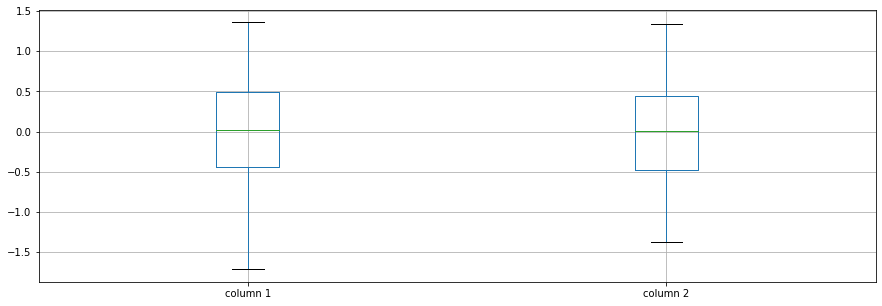

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    0.011441
column 2   -0.002677
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2
column 1,1.000000,0.008003
column 2,0.008003,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [2,2+44,2+44+44,2+44+44+44,2+44+44+44+44,2+44+44+44+44+44,2+44+44+44+44,2+44+44+44,2+44+44,2+44,2], vae_layer = False, seed = 44)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [2]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 1.113069878578186
Epoch: 1 , loss: 1.1130324358940125
Epoch: 2 , loss: 1.111448264837265
Epoch: 3 , loss: 1.1128874440193177
Epoch: 4 , loss: 1.1131931824684143
Epoch: 5 , loss: 1.1143552951812745
Epoch: 6 , loss: 1.111462402820587
Epoch: 7 , loss: 1.1124342033863068
Epoch: 8 , loss: 1.113591962337494
Epoch: 9 , loss: 1.114133698940277
Epoch: 10 , loss: 1.114060571193695
Epoch: 11 , loss: 1.1137721168994903
Epoch: 12 , loss: 1.1144222450256347
Epoch: 13 , loss: 1.1129620771408082
Epoch: 14 , loss: 1.1123631639480591
Epoch: 15 , loss: 1.1133147797584533
Epoch: 16 , loss: 1.1121904907226563
Epoch: 17 , loss: 1.1136482565402985
Epoch: 18 , loss: 1.1120142357349396
Epoch: 19 , loss: 1.1131947104930877
Epoch: 20 , loss: 1.1116869435310364
Epoch: 21 , loss: 1.1148524017333985
Epoch: 22 , loss: 1.1123813948631287
Epoch: 23 , loss: 1.1128207659721374
Epoch: 24 , loss: 1.112160228729248
Epoch: 25 , loss: 1.11131

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(4000, 2)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    0.025127
column 2   -0.002817
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\CNP.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2
0,0.000000,1.232383
1,0.000000,0.000000
2,-0.242362,0.000000
3,0.000000,0.000000
4,0.000000,0.000000
...,...,...
3995,0.000000,0.000000
3996,0.000000,0.000000
3997,0.000000,0.000000
3998,-0.695532,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(32.35822828299076, 64.9340549279942)

In [17]:
NRMS=numerator/denominator
NRMS


0.49832446655107265

In [18]:
new_df.iloc[66,:]

column 1    0.123050
column 2   -0.002817
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2
0,-0.458660,-0.002817
1,0.243480,-0.873130
2,0.008348,-0.808030
3,0.214620,-0.951980
4,0.128290,-1.031400
...,...,...
3995,0.892650,0.278030
3996,0.747410,0.428530
3997,1.076600,0.085708
3998,0.008348,0.351420


In [20]:
imputations[-1].to_excel("CNP_NG_20(imp).xlsx", index=False, header=False)